### User Overview Analysis

In [8]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
# os.chdir('..')
from src.dbconnection import get_dataFrame_from_database

In [2]:
import sys
sys.path.append('..')

In [3]:
xdr_data = pd.read_csv("../data/processed/xdr_data.csv")

#### Aggregate Each Application per User

In [4]:
from scripts.tellcoAnalysis import aggregate_xdr_data
aggregated_xdr_data=aggregate_xdr_data(xdr_data)
aggregated_xdr_data.head(10)

d:\pro\10 acadamy\telco-profitability-study\notebooks\..\scripts\tellcoAnalysis.py:163: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aggregated_df = df.groupby('MSISDN/Number').agg(


,Total_DL_And_UL,Total_Social_Media_Data,Total_Google_Data,Total_Email_Data,Total_YouTube_Data,Total_Netflix_Data,Total_Gaming_Data,Total_Other_Data,Total_Duration_Data,Total_xDR_Sessions
MSISDN/Number,,,,,,,,,,
33601.675528,182951.226284,665.487661,4923.336797,818.423801,818.423801,8047.787282,159718.700372,158876.532710,34112179.0,3.603373e+15
33601.712373,339.616950,0.602474,22.361212,2.835412,2.835412,12.478941,283.095310,786.175881,38503.0,1.311448e+13
33601.712551,900.610946,3.036290,9.613563,3.596083,3.596083,16.951885,839.795046,682.485438,52478.0,6.917538e+12
33601.713789,1587.337140,4.208402,26.033981,3.285166,3.285166,59.761378,1423.399118,1326.388626,120298.0,1.462771e+13
33601.714799,178.330679,2.489630,14.319698,3.264827,3.264827,24.873000,110.287002,82.594113,176022.0,1.311448e+13
33601.717042,334.691441,0.107064,6.820104,1.872526,1.872526,23.238525,288.996494,332.167601,127918.0,7.349883e+12
33601.718622,1315.473749,5.759823,33.188094,5.832060,5.832060,36.788932,1159.205986,1123.033280,82590.0,1.462771e+13
33601.719194,1335.339310,2.262100,31.151078,5.984782,5.984782,50.726318,1200.017097,237.557823,176459.0,1.462771e+13
33601.720129,437.461975,2.785677,2.586786,0.774081,0.774081,22.863972,380.052268,250.215756,86780.0,1.311448e+13


#### Exploratory Data Analysis (EDA) on Aggregated Data

In [5]:
aggregated_xdr_data.describe()

,Total_DL_And_UL,Total_Social_Media_Data,Total_Google_Data,Total_Email_Data,Total_YouTube_Data,Total_Netflix_Data,Total_Gaming_Data,Total_Other_Data,Total_Duration_Data,Total_xDR_Sessions
count,9.003800e+04,90038.000000,90038.000000,90038.000000,90038.000000,90038.000000,9.003800e+04,9.003800e+04,9.003800e+04,9.003800e+04
mean,8.259312e+02,3.045818,23.388865,3.763607,3.763607,37.698678,7.169239e+02,7.153117e+02,1.658846e+05,1.689111e+13
std,4.007920e+04,148.931722,1138.542409,184.112576,184.112576,1843.867901,3.474940e+04,3.501087e+04,8.112136e+06,8.251139e+14
min,3.324901e+01,0.001563,0.023708,0.018176,0.018176,0.184569,3.063580e-01,5.117690e-01,7.146000e+03,6.917538e+12
25%,3.585559e+02,1.210091,11.381826,1.672597,1.672597,18.564679,2.881509e+02,2.849859e+02,7.007000e+04,7.349883e+12
50%,6.183490e+02,2.300906,16.708112,2.793700,2.793700,26.700729,5.429110e+02,5.385891e+02,1.020740e+05,1.304243e+13
75%,8.569936e+02,3.304691,23.536615,3.842333,3.842333,37.903925,7.772646e+02,7.744172e+02,1.727990e+05,1.462771e+13
max,1.202471e+07,44682.944435,341596.376924,55238.582358,55238.582358,553214.085775,1.042554e+07,1.050403e+07,2.433741e+09,2.475544e+17


#### Variable transformations

##### Segment the users into the top five decile classes and Calculate Total Data per Decile Class

In [6]:
from scripts.tellcoAnalysis import segment_users_and_calculate_total_data
total_data_per_decile = segment_users_and_calculate_total_data(xdr_data)
print(total_data_per_decile)

decile_class
Decile 1    1.488405e+07
Decile 2    2.361998e+07
Decile 3    6.089086e+06
Decile 4    1.485374e+07
Decile 5    1.491834e+07
Name: Total_DL_+_UL, dtype: float64


d:\pro\10 acadamy\telco-profitability-study\notebooks\..\scripts\tellcoAnalysis.py:197: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_data_per_decile = data.groupby('decile_class')['Total_DL_+_UL'].sum()


#### Graphical Representation of Total Dl and Ul with in Decile


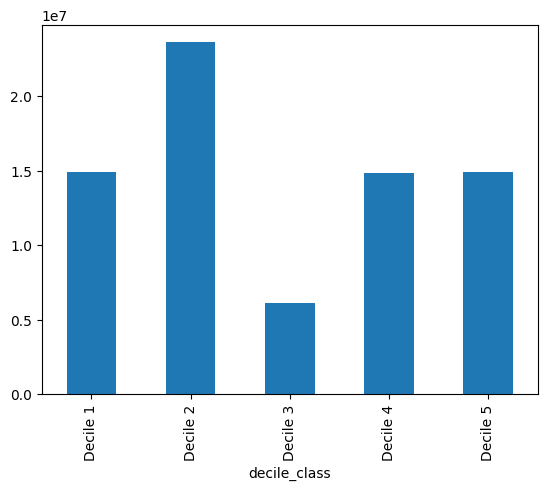

In [9]:
total_data_per_decile.plot(kind='bar')
plt.show()

#### Non-Graphical

##### Univariate Analysis: Dispersion Parameters

In [10]:
from scripts.tellcoAnalysis import compute_dispersion_parameters
dispersion_results = compute_dispersion_parameters(xdr_data)

d:\pro\10 acadamy\telco-profitability-study\notebooks\..\scripts\tellcoAnalysis.py:221: RuntimeWarning: invalid value encountered in scalar divide
  dispersion_params.loc['Coef Var', column] = data[column].std() / data[column].mean()
d:\pro\10 acadamy\telco-profitability-study\notebooks\..\scripts\tellcoAnalysis.py:221: RuntimeWarning: invalid value encountered in scalar divide
  dispersion_params.loc['Coef Var', column] = data[column].std() / data[column].mean()
d:\pro\10 acadamy\telco-profitability-study\notebooks\..\scripts\tellcoAnalysis.py:221: RuntimeWarning: invalid value encountered in scalar divide
  dispersion_params.loc['Coef Var', column] = data[column].std() / data[column].mean()


In [11]:
dispersion_results.head()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL
Range,6269003648590.668945,999.0,999.0,237770.0,1481.369432,132.888676,98561186.125774,221.989265,39.657207,49210.5,...,22.011857,23.259147,22.01192,843.439373,16.558735,843.439199,16.558668,63.248836,895.855575,924.668341
Variance,8315146431338349603061760.0,83296.235554,82999.704445,3490940814.010637,154108.666073,1247.918721,500577558786728.8125,2638.025639,121.901858,295473750.078073,...,40.264398,45.228558,40.44311,59520.138298,22.874216,59148.676796,22.743396,126.995624,59605.345737,59721.88643
Std Dev,2883599561544.277344,288.610872,288.096693,59084.184127,392.566766,35.325893,22373590.654759,51.361714,11.040917,17189.349903,...,6.345423,6.725218,6.35949,243.967494,4.7827,243.20501,4.769004,11.269234,244.142061,244.380618
IQR,5692542731480.580078,499.0,499.0,74988.0,370.342358,33.222169,50657094.738467,74.795706,14.662883,19667.0,...,10.997597,11.693322,11.031287,422.700914,8.303148,421.504914,8.238205,15.812209,422.597965,422.023902
Coef Var,0.28441,0.57816,0.577579,0.593381,0.000002,0.001049,0.461553,0.704918,0.917188,1.546868,...,0.576364,0.578421,0.578043,0.578061,0.577035,0.577546,0.577026,0.274049,0.536997,0.492937


#### Graphical

##### Univariate Analysis

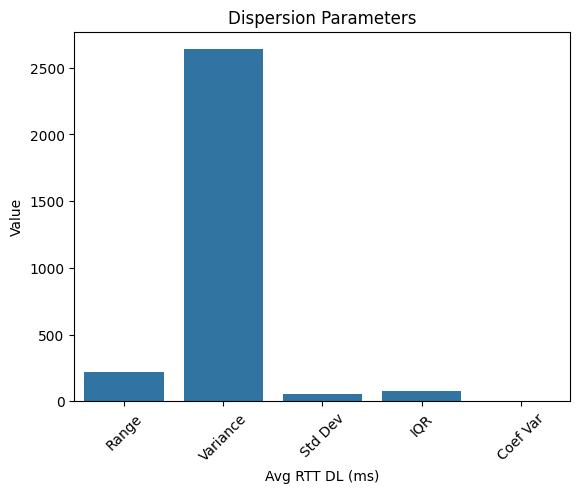

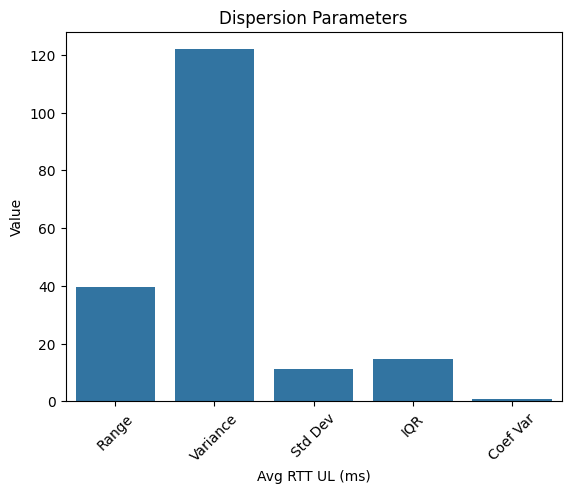

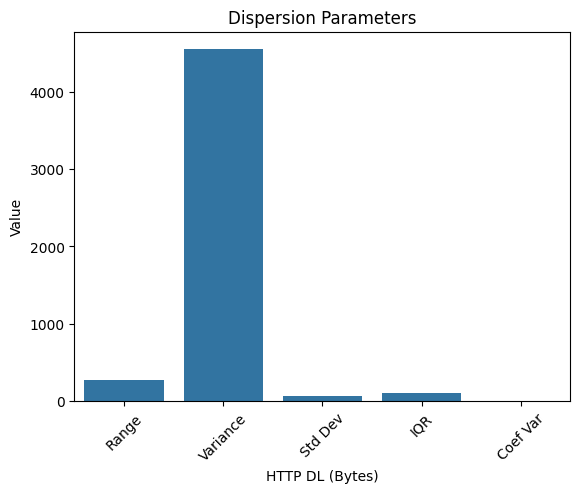

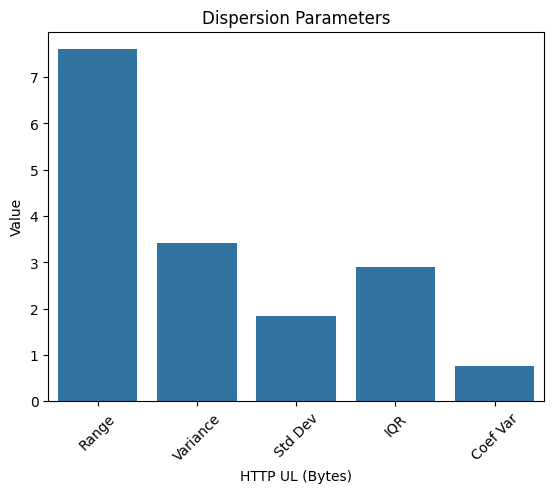

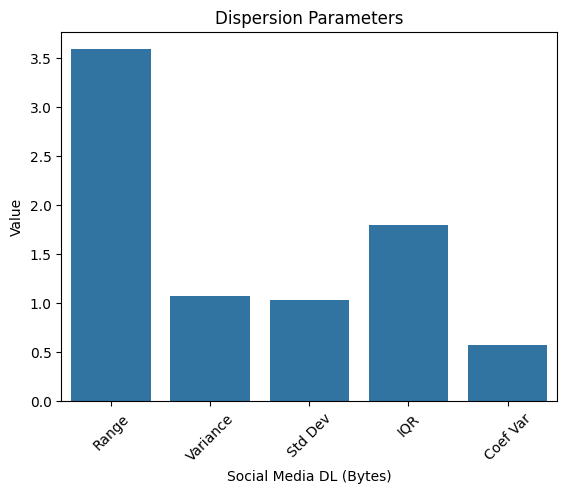

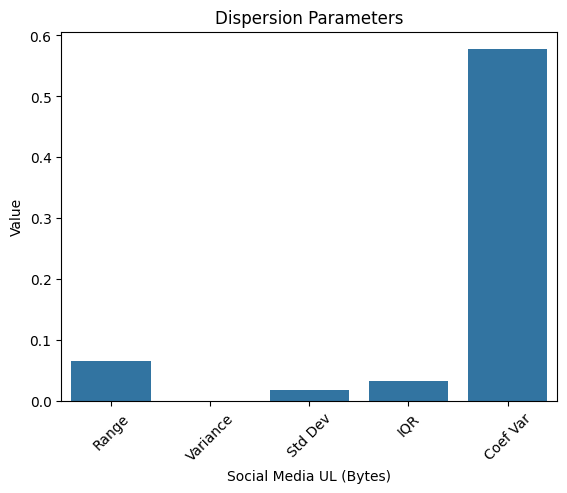

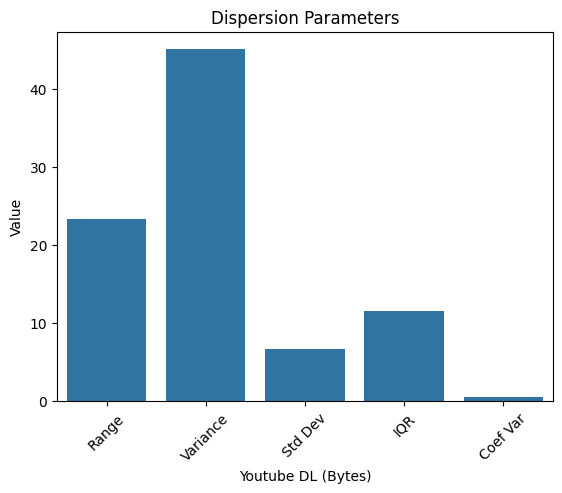

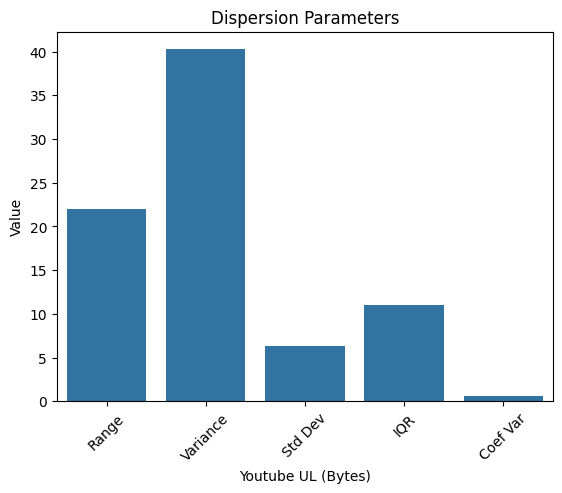

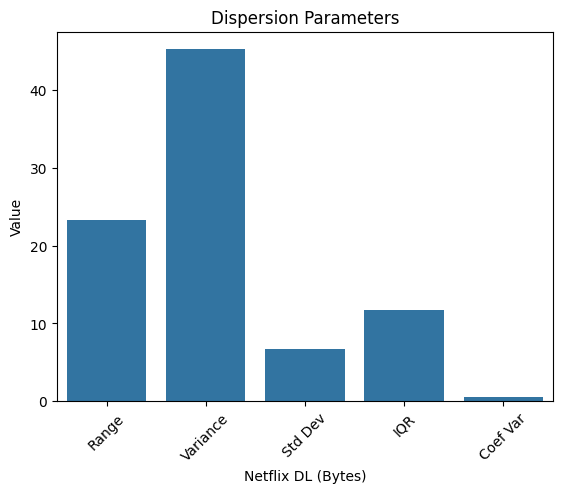

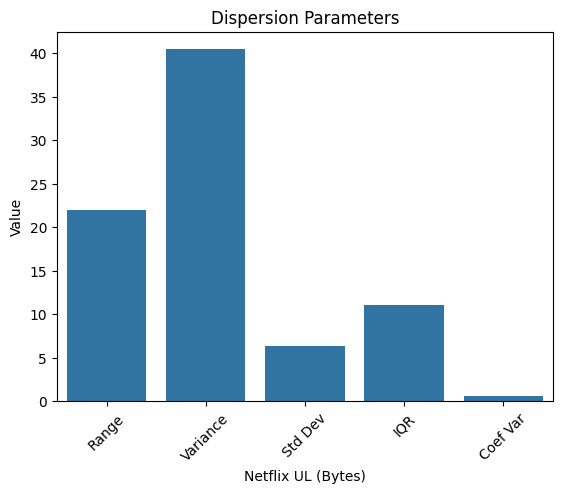

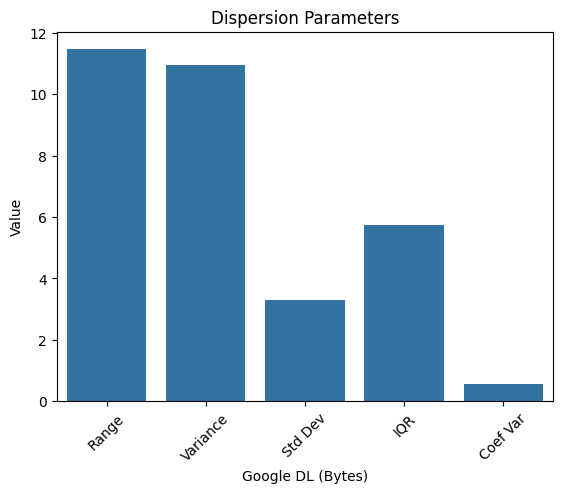

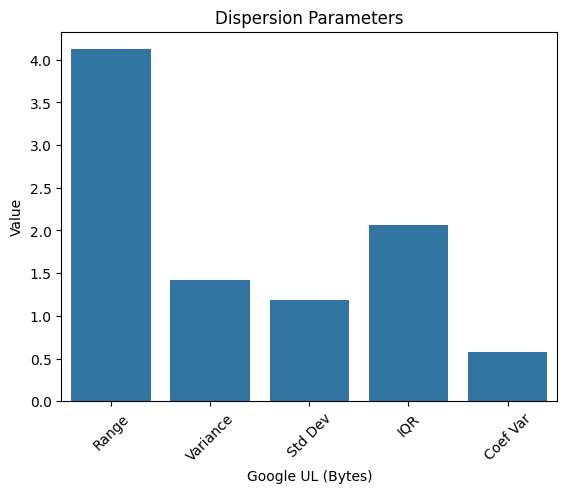

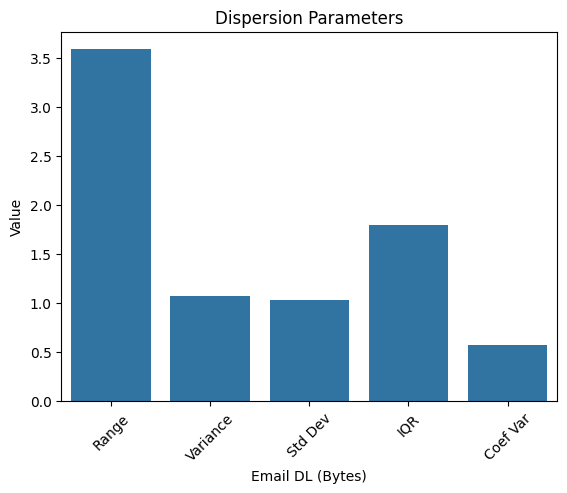

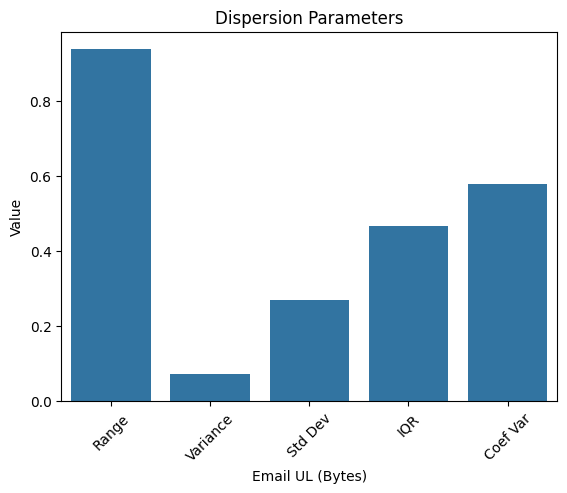

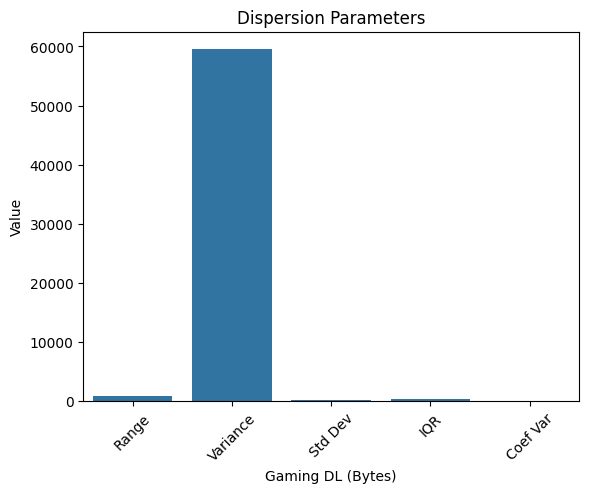

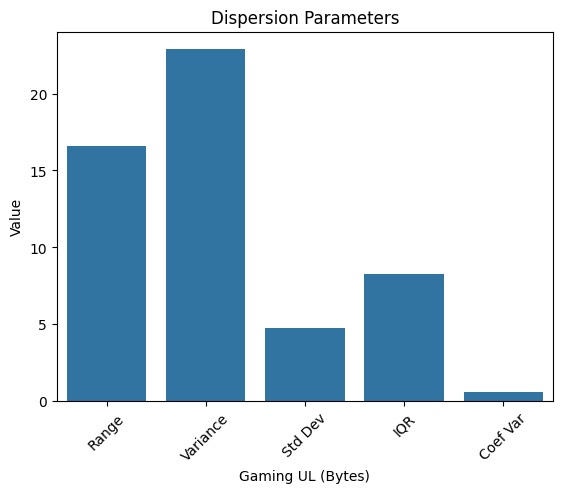

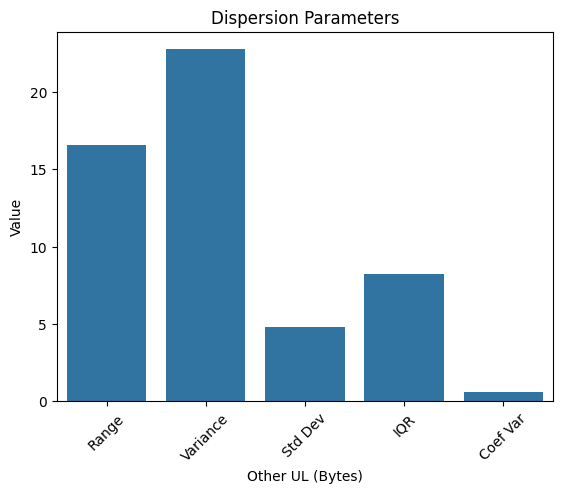

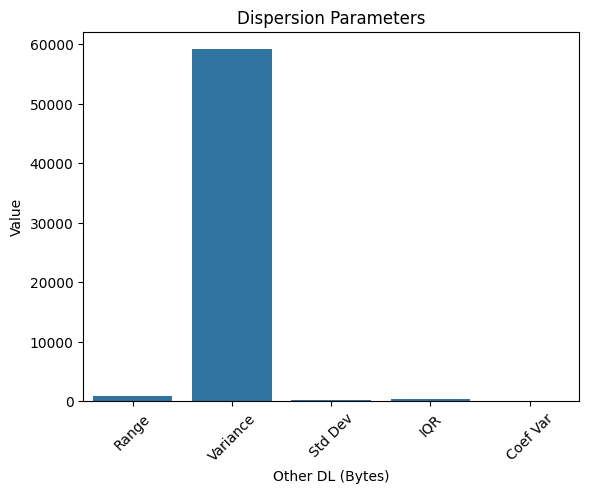

In [12]:
from scripts.tellcoAnalysis import plot_dispersion_parameters
plot_dispersion_parameters(dispersion_results,['Avg RTT DL (ms)','Avg RTT UL (ms)','HTTP DL (Bytes)','HTTP UL (Bytes)','Social Media DL (Bytes)','Social Media UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)', 'Google UL (Bytes)','Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)', 'Other DL (Bytes)'])

#### Bivariate Analysis

##### Relationship Between Each Application and Total Data DL and UL

In [13]:
xdr_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL,decile_class
0,1.311448e+13,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,244912.0,2.082014e+08,33664.962239,3.552121e+07,9.16456699548519E+015,...,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636,345.629377,Decile 5
1,1.311448e+13,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,244912.0,2.082019e+08,33681.854413,3.579401e+07,L77566A,...,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965,707.185356,Decile 5
2,1.311448e+13,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,244912.0,2.082008e+08,33734.564203,3.528151e+07,D42335A,...,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335,307.690973,Decile 5
3,1.311448e+13,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,244912.0,2.082014e+08,33734.564203,3.535661e+07,T21824A,...,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,846.028530,889.352748,Decile 5
4,1.311448e+13,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,244912.0,2.082014e+08,33699.795932,3.540701e+07,D88865A,...,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589,607.681403,Decile 5
